In [2]:
pip install pybithumb

  Stored in directory: C:\Users\student\AppData\Local\pip\Cache\wheels\a0\b0\b2\4f80b9456b87abedbc0bf2d52235414c3467d8889be38dd472
Successfully built bs4
Note: you may need to restart the kernel to use updated packages.


In [1]:
import requests
from bs4 import BeautifulSoup

import pandas as pd
from datetime import datetime
import time
import re
import pybithumb

In [2]:
p=int(input('최대크롤링할 페이지 수를 입력하시오.:'))
q=input('검색어 입력:')
urls_list = []
for i in range(0,p):
    url='https://search.naver.com/search.naver?&where=news&query='+q+'&sm=tab_pge&sort=0&photo=0&field=0&reporter_article=&pd=0&ds=&de=&docid=&nso=so:r,p:all,a:all&mynews=0&cluster_rank=49&start='+str(i)+'1&refresh_start=0'
    web = requests.get(url).content
    source = BeautifulSoup(web, 'html.parser')
    news_subjects = source.find_all('a', {'class' : '_sp_each_title'})
    subject_list = []

    for subject in news_subjects:
        subject_list.append(subject.find('dt'))
    for urls in source.find_all('a', {'class' : "_sp_each_url"}):
        if urls["href"].startswith("https://news.naver.com"): 
            urls_list.append(urls["href"])

print(urls_list)

최대크롤링할 페이지 수를 입력하시오.:10
검색어 입력:삼성
['https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=105&oid=092&aid=0002177257', 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=032&aid=0002981867', 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=003&aid=0009617297', 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=105&oid=005&aid=0001270489', 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=003&aid=0009618311', 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=025&aid=0002961998', 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=104&oid=016&aid=0001616441', 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=374&aid=0000200962', 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=105&oid=001&aid=0011285817', 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=105&oid=215&aid=0000832884', 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=105&oid=366&aid

In [3]:
titles = []
dates = []
articles = []
article_urls = []
press_companies = []

In [4]:
for i in range(len(urls_list)):
    try:
        web_news = requests.get(urls_list[i]).content
        source_news = BeautifulSoup(web_news, 'html.parser')

        title = source_news.find('h3', {'id' : 'articleTitle'}).get_text()
        print('Processing article : {}'.format(title))

        # 3) 기사 날짜
        date = source_news.find('span', {'class' : 't11'}).get_text()

        article = source_news.find('div', {'id' : 'articleBodyContents'}).get_text()
        article = article.replace("\n", "") # 교체하다
        article = article.replace("// flash 오류를 우회하기 위한 함수 추가function _flash_removeCallback() {}", "")
        article = article.replace("동영상 뉴스       ", "")
        article = article.strip()

        pattern = re.compile(r'[\s\Wa-zA-Z0-9]*@')  # 정규표현식 상세 설명 @ http://j.mp/2PzgFO8
        article= pattern.sub('',article)

        
        

        # 6) 기사 발행 언론사
        press_company = source_news.find('address', {'class' : 'address_cp nclicks(fot.presscr)'}).find('a').get_text()
        
        
        titles.append(title)
        dates.append(date)
        articles.append(article)
        article_urls.append(urls_list[i])
        press_companies.append(press_company)
        
    except:
            print('*** 다음 링크의 뉴스를 크롤링하는 중 에러가 발생했습니다 : {}'.format(url))

Processing article : 삼성전자 차세대 폴더블폰 추정 사진 유출
Processing article : 삼성, ‘정사각형 폴더블폰’ 이미지 유출?
Processing article : 삼성전자 차기 폴더블폰 추정 사진 중국서 '유출'
Processing article : “조개껍질처럼 접힌다”…차기 삼성 폴더블폰 추정 이미지 유출
Processing article : 삼성, 中서 330만원대 초고가 갤폴드 판매…몇 분만에 '완판'
Processing article : 中서 삼성 초고가 갤럭시폴드 한정판, 출시 직후 '매진'
Processing article : ‘삼성폰愛’ 빠진 차이나…332만원대 갤럭시폴드 한정판도 ‘매진’
Processing article : [who] 삼성 이재용, ‘롤모델’ 발렌베리와 손잡을까
Processing article : 삼성전자, 모바일 B2B 강화…새 태블릿 앞세워 협력 늘려
Processing article : 삼성 '갤럭시폴드' 차기작, 실물 사진 유출…"접으면 정사각형"
Processing article : 위아래로 접히는 삼성 차기 폴더블폰 추정 사진, 中서 유출
Processing article : 삼성바이오에피스 '온트루잔트', WHO PQ인증 획득
Processing article : 삼성바이오 유방암치료제 WHO 품질인증…"바이오시밀러 최초"
Processing article : 삼성, '갤럭시노트10' 아우라 화이트 색상 출시
Processing article : 삼성, QLED TV 50% 확대...총 4200만대 목표
Processing article : [취재수첩] 삼성, 준법경영·노사화합 약속…이번엔?
Processing article : 르노삼성차, 'SM7 LPe' 200대 한정에 최대 200만원 할인
Processing article : 삼성 ‘글로벌 벤처투자’ 동남아 확산
Processing article : 삼성바이오에피스 '온트루잔트', WHO PQ인증 획득
Processing 

In [7]:
print(q)

삼성


In [5]:
article_df = pd.DataFrame({'Title':titles, 
                           'Date':dates, 
                           'Article':articles, 
                           'URL':article_urls, 
                           'PressCompany':press_companies})

article_df.to_excel(q+'result_{}.xlsx'.format(datetime.now().strftime('%y%m%d_%HH%MM')), index=False, encoding='utf-8')
article_df.head()

,Title,Date,Article,URL,PressCompany
0,삼성전자 차세대 폴더블폰 추정 사진 유출,2019.12.20. 오전 9:08,위아래로 접어...삼성 발표 컨셉 이미지와 비슷(지디넷코리아=이정현 기자)삼성전자...,https://news.naver.com/main/read.nhn?mode=LSD&...,ZDNet Korea
1,"삼성, ‘정사각형 폴더블폰’ 이미지 유출?",2019.12.20. 오후 4:18,중국의 IT 전문가인 아이스 유니버스의 트위터 캡처삼성전자의 차기 폴더블폰으로 추정...,https://news.naver.com/main/read.nhn?mode=LSD&...,media KHAN
2,삼성전자 차기 폴더블폰 추정 사진 중국서 '유출',2019.12.20. 오전 9:12,"지난 10월 삼성 개발자회의서 공개된 클램셸 타입 폴더블폰과 유사""시제품인지 가짜인...",https://news.naver.com/main/read.nhn?mode=LSD&...,뉴시스
3,“조개껍질처럼 접힌다”…차기 삼성 폴더블폰 추정 이미지 유출,2019.12.20. 오전 10:57,삼성전자 갤럭시 폴드의 뒤를 잇는 차기 폴더블폰 추정 사진이 중국에서 유출됐다. 클...,https://news.naver.com/main/read.nhn?mode=LSD&...,국민일보
4,"삼성, 中서 330만원대 초고가 갤폴드 판매…몇 분만에 '완판'",2019.12.20. 오후 3:59,20일 중국삼성닷컴 온라인 몰에서 5G모델 갤럭시폴드 판매330만원대 초고가임에도 ...,https://news.naver.com/main/read.nhn?mode=LSD&...,뉴시스


In [6]:
import nltk

In [8]:
from konlpy.tag import Twitter

In [9]:
df = pd.read_excel(q+'result_191220_17H23M.xlsx', encoding='utf-8')
df.head()

,Title,Date,Article,URL,PressCompany
0,삼성전자 차세대 폴더블폰 추정 사진 유출,2019.12.20. 오전 9:08,위아래로 접어...삼성 발표 컨셉 이미지와 비슷(지디넷코리아=이정현 기자)삼성전자...,https://news.naver.com/main/read.nhn?mode=LSD&...,ZDNet Korea
1,"삼성, ‘정사각형 폴더블폰’ 이미지 유출?",2019.12.20. 오후 4:18,중국의 IT 전문가인 아이스 유니버스의 트위터 캡처삼성전자의 차기 폴더블폰으로 추정...,https://news.naver.com/main/read.nhn?mode=LSD&...,media KHAN
2,삼성전자 차기 폴더블폰 추정 사진 중국서 '유출',2019.12.20. 오전 9:12,"지난 10월 삼성 개발자회의서 공개된 클램셸 타입 폴더블폰과 유사""시제품인지 가짜인...",https://news.naver.com/main/read.nhn?mode=LSD&...,뉴시스
3,“조개껍질처럼 접힌다”…차기 삼성 폴더블폰 추정 이미지 유출,2019.12.20. 오전 10:57,삼성전자 갤럭시 폴드의 뒤를 잇는 차기 폴더블폰 추정 사진이 중국에서 유출됐다. 클...,https://news.naver.com/main/read.nhn?mode=LSD&...,국민일보
4,"삼성, 中서 330만원대 초고가 갤폴드 판매…몇 분만에 '완판'",2019.12.20. 오후 3:59,20일 중국삼성닷컴 온라인 몰에서 5G모델 갤럭시폴드 판매330만원대 초고가임에도 ...,https://news.naver.com/main/read.nhn?mode=LSD&...,뉴시스


In [10]:
articles = df['Article'].tolist()
len(articles)

76

In [11]:
articles = ''.join(articles)
articles[:1000]

"위아래로 접어...삼성 발표 컨셉 이미지와 비슷(지디넷코리아=이정현  기자)삼성전자의 차세대 폴더블 스마트폰으로 추정되는 사진이 유출됐다고 더버지 등 주요 외신이 19일(현지시간) 보도했다.삼성전자의 차세대 폴더블 스마트폰으로 추정되는 사진이 유출됐다. (사진=왕벤홍(王奔宏) 웨이보)이 사진은 중국 웨이보를 통해 처음 유출된 것으로, 공개된 사진을 보면 새로운 폴더블 스마트폰은 화면이 위아래로 접히는 방식으로 개발됐다. 또, 화면 접으면 작은 화면에 날짜와 시간을 알려준다. 스마트폰 전면은 홀 디스플레이가 적용돼 상단 중앙에 카메라가 있으며, 후면에는 듀얼 카메라가 장착됐다.이 달 초 블룸버그 통신은 차세대 갤럭시 폴드는 내년 초 갤럭시S11와 함께 출시될 것이며, 1억800만 화소 메인 카메라와 5배 줌 카메라를 갖출 것이라고 전망한 바 있다.사진=왕벤홍(王奔宏) 웨이보더버지는 유출된 사진이 실제 출시될 단말기 사진인지 시제품이나 컨셉 제품, 가짜인지 알 수 없다고 전했다. 하지만, 유출된 폴더블폰의 전체적인 모습이 지난 10월 삼성전자가 삼성 개발자 컨퍼런스 2018에서 공유한 폴더블폰 컨셉 이미지와 비슷하다고 덧붙였다.지난 3월에도 블룸버그 통신은 삼성전자가 갤럭시 폴드를 이을 바깥 쪽으로 접히는 아웃폴딩 방식의 폴더블 폰을 개발하고 있다고 보도한 바 있다.중국 화웨이도  내년 MWC 2020에서 폴더블 스마트폰 차기작인 메이트Xs를 공개할 예정이라는 보도가 어제 나왔다. 메이트Xs는 더 나은 힌지 설계와 더 나은 프로세서, 더 나은 폴더블 스크린을 보유할 것으로 전망된다.이정현 기자zdnet.co.kr) ▶ 지디넷코리아 '홈페이지' / ▶ 지디넷코리아 ‘이슈진단+’ ▶ 네이버 채널에서 ‘지디넷코리아’를 구독해주세요중국의 IT 전문가인 아이스 유니버스의 트위터 캡처삼성전자의 차기 폴더블폰으로 추정되는 실물 사진이 유출됐다. 미국의 IT 전문매체 더 버지 등은 지난 19일(현지시간) 중국의 IT 전문가인 아이스 유니버스가 트위터를 통해 “중국 소셜네트워크

In [12]:
twitter = Twitter()
raw_pos_tagged = twitter.pos(articles, norm=True, stem=True)
raw_pos_tagged

C:\ProgramData\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


[('위아래', 'Noun'),
 ('로', 'Josa'),
 ('접다', 'Verb'),
 ('...', 'Punctuation'),
 ('삼성', 'Noun'),
 ('발표', 'Noun'),
 ('컨셉', 'Noun'),
 ('이미지', 'Noun'),
 ('와', 'Josa'),
 ('비슷', 'Noun'),
 ('(', 'Punctuation'),
 ('지다', 'Verb'),
 ('넷', 'Noun'),
 ('코리아', 'Noun'),
 ('=', 'Punctuation'),
 ('이정현', 'Noun'),
 ('기자', 'Noun'),
 (')', 'Punctuation'),
 ('삼', 'Modifier'),
 ('성', 'Modifier'),
 ('전자', 'Noun'),
 ('의', 'Josa'),
 ('차세대', 'Noun'),
 ('폴', 'Noun'),
 ('더블', 'Noun'),
 ('스마트폰', 'Noun'),
 ('으로', 'Josa'),
 ('추정', 'Noun'),
 ('되다', 'Verb'),
 ('사진', 'Noun'),
 ('이', 'Josa'),
 ('유출', 'Noun'),
 ('돼다', 'Verb'),
 ('더버', 'Noun'),
 ('지', 'Josa'),
 ('등', 'Noun'),
 ('주요', 'Noun'),
 ('외신', 'Noun'),
 ('이', 'Josa'),
 ('19일', 'Number'),
 ('(', 'Punctuation'),
 ('현지', 'Noun'),
 ('시간', 'Noun'),
 (')', 'Punctuation'),
 ('보도', 'Noun'),
 ('하다', 'Verb'),
 ('.', 'Punctuation'),
 ('삼', 'Modifier'),
 ('성', 'Modifier'),
 ('전자', 'Noun'),
 ('의', 'Josa'),
 ('차세대', 'Noun'),
 ('폴', 'Noun'),
 ('더블', 'Noun'),
 ('스마트폰', 'Noun'),
 ('으로',

In [18]:
del_list = ['하다', '있다', '되다', '이다', '돼다', '않다', '그렇다', '아니다', '이렇다', '그렇다', '어떻다','삼성'] 

word_cleaned = []
for word in raw_pos_tagged:
    if not word[1] in ["Josa", "Eomi", "Punctuation", "Foreign"]: # Foreign == ”, “ 와 같이 제외되어야할 항목들
        if (len(word[0]) != 1) & (word[0] not in del_list): # 한 글자로 이뤄진 단어들을 제외 & 원치 않는 단어들을 제외
            word_cleaned.append(word[0])
        
word_cleaned

['위아래',
 '접다',
 '발표',
 '컨셉',
 '이미지',
 '비슷',
 '지다',
 '코리아',
 '이정현',
 '기자',
 '전자',
 '차세대',
 '더블',
 '스마트폰',
 '추정',
 '사진',
 '유출',
 '더버',
 '주요',
 '외신',
 '19일',
 '현지',
 '시간',
 '보도',
 '전자',
 '차세대',
 '더블',
 '스마트폰',
 '추정',
 '사진',
 '유출',
 '사진',
 '베다',
 '웨이보',
 '사진',
 '중국',
 '웨이보',
 '통해',
 '처음',
 '유출',
 '공개',
 '사진',
 '보다',
 '새롭다',
 '더블',
 '스마트폰',
 '화면',
 '위아래',
 '접다',
 '방식',
 '개발',
 '화면',
 '접다',
 '작다',
 '화면',
 '날짜',
 '시간',
 '알다',
 '주다',
 '스마트폰',
 '전면',
 '디스플레이',
 '적용',
 '상단',
 '중앙',
 '카메라',
 '후면',
 '듀얼',
 '카메라',
 '장착',
 '블룸버그',
 '통신',
 '차세대',
 '갤럭시',
 '들다',
 '내년',
 '갤럭시',
 '11',
 '오다',
 '함께',
 '출시',
 '1억',
 '800만',
 '화소',
 '메인',
 '카메라',
 '카메라',
 '갖추다',
 '전망',
 '사진',
 '베다',
 '웨이보',
 '더버',
 '유출',
 '사진',
 '실제',
 '출시',
 '단말기',
 '사진',
 '제품',
 '컨셉',
 '제품',
 '가짜',
 '없다',
 '하지만',
 '유출',
 '더블',
 '전체',
 '모습',
 '지난',
 '10월',
 '전자',
 '개발자',
 '컨퍼런스',
 '2018',
 '공유',
 '더블',
 '컨셉',
 '이미지',
 '비슷하다',
 '덧붙이다',
 '지난',
 '3월',
 '블룸버그',
 '통신',
 '전자',
 '갤럭시',
 '폴드',
 '바깥',
 '접다',
 '아웃',
 '폴딩',
 '방식',
 '더블',
 '개발',
 '보도

In [19]:
word_dic = {}

for word in word_cleaned:
    if word not in word_dic:
        word_dic[word] = 1 # changed from "0" to "1"
    else:
        word_dic[word] += 1
        
word_dic

{'위아래': 5,
 '접다': 20,
 '발표': 45,
 '컨셉': 8,
 '이미지': 26,
 '비슷': 1,
 '지다': 22,
 '코리아': 18,
 '이정현': 2,
 '기자': 88,
 '전자': 499,
 '차세대': 8,
 '더블': 42,
 '스마트폰': 44,
 '추정': 13,
 '사진': 45,
 '유출': 17,
 '더버': 2,
 '주요': 28,
 '외신': 7,
 '19일': 37,
 '현지': 17,
 '시간': 28,
 '보도': 10,
 '베다': 10,
 '웨이보': 9,
 '중국': 89,
 '통해': 53,
 '처음': 32,
 '공개': 40,
 '보다': 70,
 '새롭다': 17,
 '화면': 18,
 '방식': 13,
 '개발': 21,
 '작다': 5,
 '날짜': 6,
 '알다': 3,
 '주다': 10,
 '전면': 11,
 '디스플레이': 23,
 '적용': 19,
 '상단': 3,
 '중앙': 19,
 '카메라': 16,
 '후면': 3,
 '듀얼': 6,
 '장착': 5,
 '블룸버그': 2,
 '통신': 12,
 '갤럭시': 62,
 '들다': 15,
 '내년': 50,
 '11': 7,
 '오다': 124,
 '함께': 48,
 '출시': 53,
 '1억': 2,
 '800만': 2,
 '화소': 3,
 '메인': 13,
 '갖추다': 6,
 '전망': 33,
 '실제': 6,
 '단말기': 3,
 '제품': 77,
 '가짜': 7,
 '없다': 65,
 '하지만': 21,
 '전체': 21,
 '모습': 10,
 '지난': 89,
 '10월': 26,
 '개발자': 15,
 '컨퍼런스': 2,
 '2018': 2,
 '공유': 7,
 '비슷하다': 5,
 '덧붙이다': 7,
 '3월': 7,
 '폴드': 29,
 '바깥': 1,
 '아웃': 1,
 '폴딩': 1,
 '화웨이': 26,
 'MWC': 1,
 '2020': 9,
 '차기작': 3,
 '메이트': 3,
 'Xs': 2,
 '예정': 2

In [20]:
sorted_word_dic = sorted(word_dic.items(), key=lambda x:x[1], reverse=True)
sorted_word_dic

[('전자', 499),
 ('노조', 283),
 ('부회장', 138),
 ('TV', 136),
 ('오다', 124),
 ('받다', 119),
 ('경영', 115),
 ('그룹', 114),
 ('이사회', 100),
 ('발렌', 99),
 ('베리', 99),
 ('회장', 98),
 ('노사', 97),
 ('재판', 91),
 ('의장', 90),
 ('중국', 89),
 ('지난', 89),
 ('기업', 89),
 ('기자', 88),
 ('제품', 77),
 ('서비스', 77),
 ('시장', 75),
 ('선고', 73),
 ('판매', 72),
 ('구속', 71),
 ('보다', 70),
 ('배포', 68),
 ('늘다', 67),
 ('없다', 65),
 ('무단', 64),
 ('금지', 64),
 ('뉴스', 63),
 ('입장', 63),
 ('갤럭시', 62),
 ('관련', 62),
 ('인사', 62),
 ('한국', 61),
 ('미래', 61),
 ('전략', 61),
 ('직원', 61),
 ('이재용', 60),
 ('서울', 59),
 ('따르다', 58),
 ('네이버', 57),
 ('기술', 57),
 ('구독', 56),
 ('이번', 56),
 ('AI', 56),
 ('통해', 53),
 ('출시', 53),
 ('바이오', 53),
 ('나오다', 52),
 ('사업', 52),
 ('판결', 51),
 ('내년', 50),
 ('밝히다', 50),
 ('회사', 50),
 ('경제', 49),
 ('사건', 49),
 ('혐의', 49),
 ('함께', 48),
 ('물산', 48),
 ('가격', 47),
 ('발표', 45),
 ('사진', 45),
 ('미국', 45),
 ('보이다', 45),
 ('협력', 45),
 ('많다', 45),
 ('문화', 45),
 ('스마트폰', 44),
 ('18일', 44),
 ('이상훈', 44),
 ('파운드리', 44),
 ('채널', 43),

In [21]:
import nltk
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 한글 폰트 위치를 넣어주세요 (위에서 나눔고딕 파일을 해당 경로에 복사붙여넣기 했을 경우 그대로 실행하셔도 무방합니다.)
font_name = matplotlib.font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name() # NanumGothic.otf
matplotlib.rc('font', family=font_name)

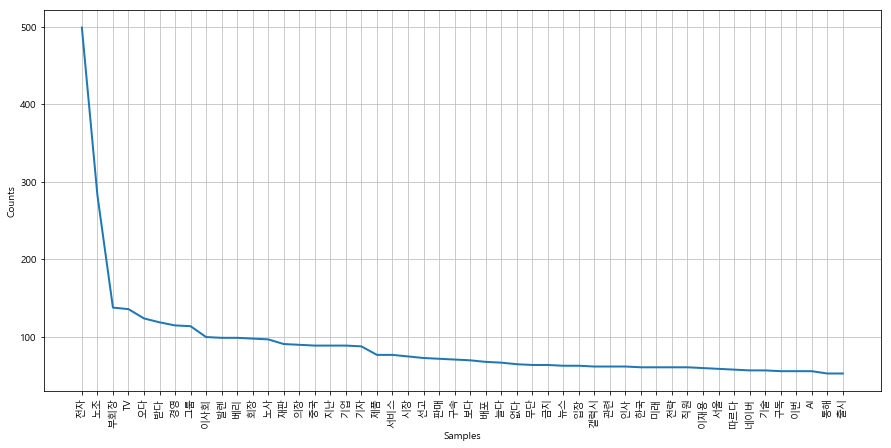

In [22]:
word_counted = nltk.Text(word_cleaned) 
plt.figure(figsize=(15, 7)) # plot 영역(그래프 영역)의 크기를 지정합니다.
word_counted.plot(50) # 상위 50개 단어를 보여줍니다.

In [23]:
word_frequency = nltk.FreqDist(word_cleaned)
word_frequency
df = pd.DataFrame(list(word_frequency.values()), word_frequency.keys()) 

# 빈도 내림차순으로 정렬합니다.
result = df.sort_values([0], ascending=False)

# 전체 데이터(단어 수)는 너무 많기 때문에 출현 횟수 상위 50개만 가져와 시각화합니다.
result = result[:50]
# result

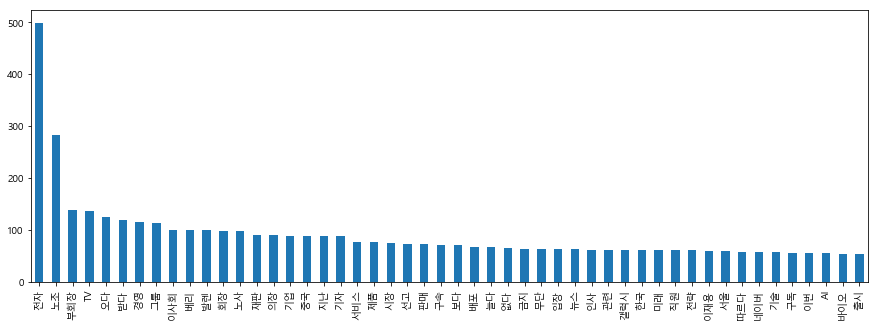

In [24]:
result.plot(kind='bar', legend=False, figsize=(15,5)) 
# 그림 사이즈를 변경하고 싶을 경우 figsize=(가로, 세로) 를 변경합니다.
# 기타 그래프 관련 옵션은 https://goo.gl/YNejGt 에서 확인하고 적용하실 수 있습니다.

plt.show()

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image # 만약 "No module named 'PIL'" 에러가 발생하면 [ pip install Pillow==5.4.1 ] 로 라이브러리를 설치해줍니다.

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
word_cloud = WordCloud(font_path="C:/Windows/Fonts/malgun.ttf", # font_path="C:/Windows/Fonts/NanumSquareB.ttf"
                       width=2000, height=1000, # 이 부분을 수정하시면 실제 워드클라우드의 크기가 바뀝니다 (해상도가 바뀝니다)
                       # prefer_horizontal= 1.0, # 이 부분의 주석을 해제하시면 단어들이 가로로만 그려지게 됩니다. (0~1)
                       background_color='white')

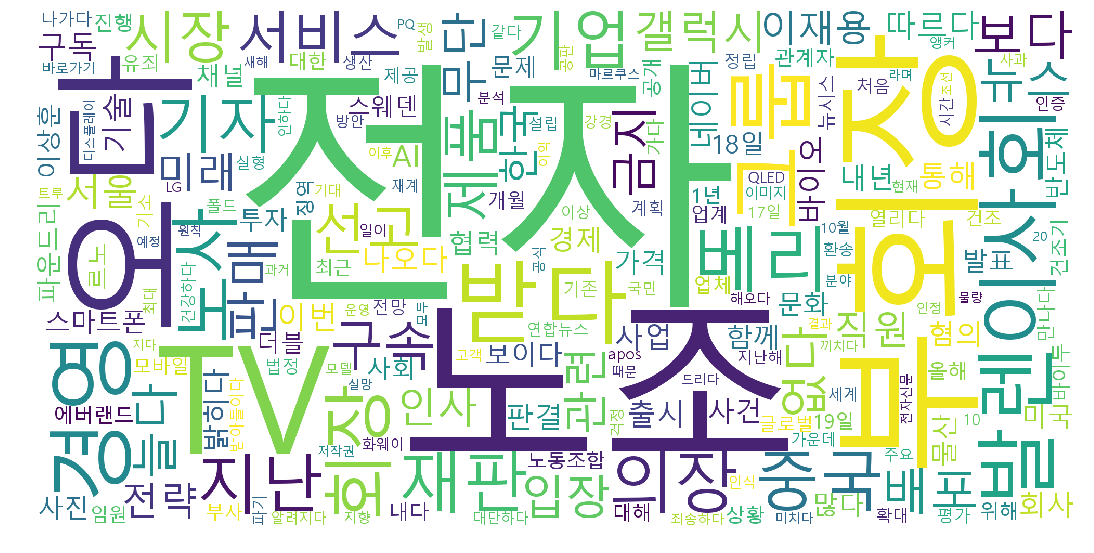

In [28]:
word_cloud.generate_from_frequencies(word_dic) 
plt.figure(figsize=(15,15)) # 이 부분을 수정하시면 화면에서 보여지는 워드클라우드의 크기가 바뀝니다 
plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [29]:
from sklearn import naive_bayes